# Distribution Transform

- This notebook is based on Michael Pyrcz lecture about **Distribution Transform**. To check it, click on the link below:
  https://www.youtube.com/watch?v=ZDIpE3OkAIU&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=14&t=2s
<br>

- There are many reasons to transform data from a given distribution to another distribution, such as:
  - Suppose that we've sampled just a few data from a given variable and we have a prior knowledge about the shape of that variable distribution. Therefore, we may transform the raw data.

  - When we use specific techniques or workflows that require a specific statistical distribution, we must transform the raw data. For example, in order to perform Sequential Gaussian Simulation, we must transform the raw data into gaussian distributed data.
<br>

- A distribution transform may be applied to any parametric or non-parametric distribution. For example, we could transform a non-parametric distribution to a parametric distribution (e.g. Gaussian, Lognormal). In order to do it, we just need to map from one distribution to another through cumulative frequencies/percentiles
<br>

- In order to obtain the cumulative frequencies (Fx), we'll use the following equation, since we do are not sure about upper and lower tails:
<br>

<table>
  <tr>
    <td><b>Fx = sample index/(N+1)</b></td>
  </tr>
</table>
<br>
<br>


In [45]:
# Function that transform raw data to a standard normally distributed data:

NScoreTransform <- function (data=NA){

  sample_index <- 1:length(data)

  # Getting the cumulative frequencies:
  Fx <- rep(NA,length(sample_index))
  for(i in sample_index){
    Fx[i] <- sample_index[i]/(length(sample_index)+1)
  }

  # Getting the nscores:
  n_scores <- rep(NA,length(sample_index))
  for(i in sample_index){
    n_scores[i] <- qnorm(Fx[i])
  }

  return(n_scores)
}

In [46]:
# Function that transform raw data to a uniformy distributed data:

UScoreTransform <- function (data=NA){

  sample_index <- 1:length(data)

  # Getting the cumulative frequencies:
  Fx <- rep(NA,length(sample_index))
  for(i in sample_index){
    Fx[i] <- sample_index[i]/(length(sample_index)+1)
  }

  # Getting the uniform scores:
  u_scores <- rep(NA,length(sample_index))
  for(i in sample_index){
    u_scores[i] <- qunif(Fx[i])
  }

  return(u_scores)
}

## Example 1: Transforming Raw Cr(%) Data to Gaussian Distributed Data

<table align="center">
  <tr align="center">
    <td><b>Sample Index</b></td>
    <td><b>Cr(%)</b></td>
  </tr>
  <tr align="center">
    <td>1</td>
    <td>5</td>
  </tr>
  <tr align="center">
    <td>2</td>
    <td>7</td>
  </tr>
  <tr align="center">
    <td>3</td>
    <td>8</td>
  </tr>
  <tr align="center">
    <td>4</td>
    <td>9</td>
  </tr>
  <tr align="center">
    <td>5</td>
    <td>9</td>
  </tr>
  <tr align="center">
    <td>6</td>
    <td>10</td>
  </tr>
  <tr align="center">
    <td>7</td>
    <td>13</td>
  </tr>
  <tr align="center">
    <td>8</td>
    <td>15</td>
  </tr>
  <tr align="center">
    <td>9</td>
    <td>17</td>
  </tr>
  <tr align="center">
    <td>10</td>
    <td>29</td>
  </tr>
</table><br><br>

In [18]:
# Variable Cr(%):
Cr <- c(5,7,8,9,9,10,13,15,17,29)

In [60]:
# Cr(%) transformed:
Cr_nscores <- NScoreTransform(Cr)

In [57]:
data.frame(Sample_Index=1:10, Raw_Cr=Cr,NSCORES=Cr_nscores)

Sample_Index,Raw_Cr,NSCORES
<int>,<dbl>,<dbl>
1,5,-1.3351777
2,7,-0.9084579
3,8,-0.6045853
4,9,-0.3487557
5,9,-0.1141853
6,10,0.1141853
7,13,0.3487557
8,15,0.6045853
9,17,0.9084579


## Example 2: Tranforming Uniformly Distributed Data to Gaussian Distributed Data

In [47]:
# Creating data uniformly distributed:
unif_data <- runif(1000)

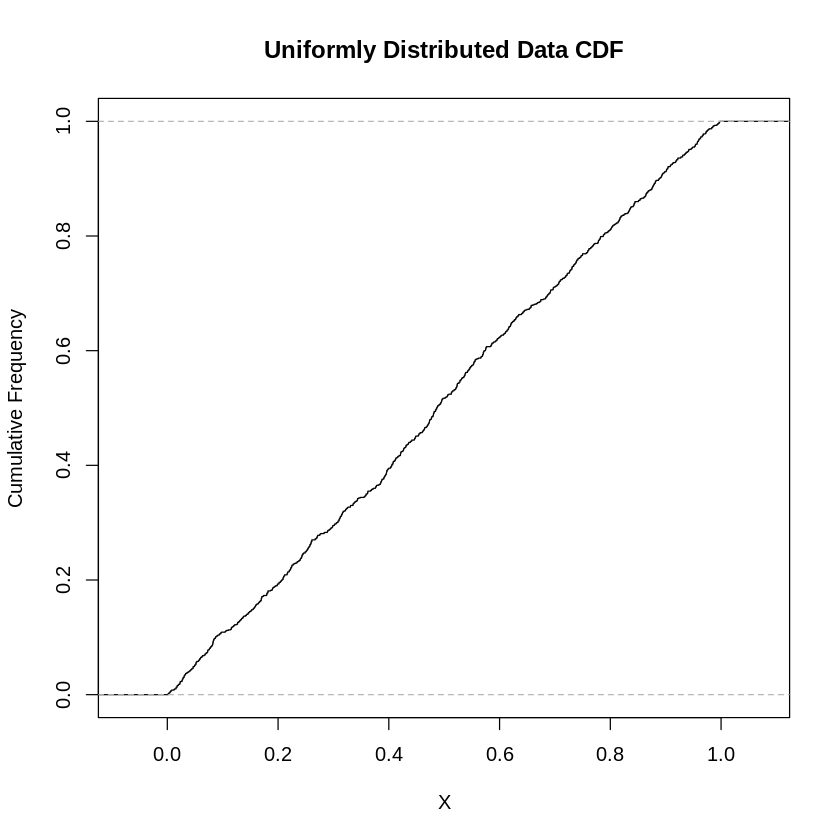

In [35]:
# Plotting Uniformly Distributed Data CDF:
plot(ecdf(unif_data),
    main="Uniformly Distributed Data CDF",
    xlab="X",
    ylab="Cumulative Frequency")

In [48]:
# Tranforming Uniformly Distributed Data to Gaussian Distributed Data:
unif_data_nscores <- NScoreTransform(unif_data)

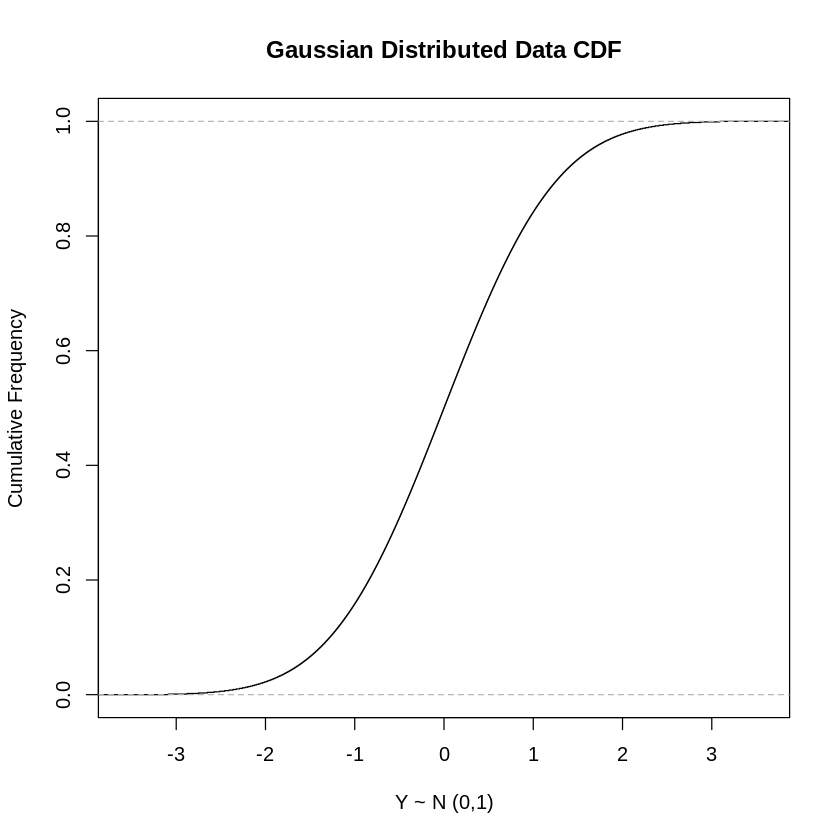

In [38]:
# Plotting Gaussian Distributed Data CDF:
plot(ecdf(unif_data_nscores),
    main="Gaussian Distributed Data CDF",
    xlab="Y ~ N (0,1)",
    ylab="Cumulative Frequency")

## Example 3: Transforming Raw Cr(%) Data to Uniformly Distributed Data

<table align="center">
  <tr align="center">
    <td><b>Sample Index</b></td>
    <td><b>Cr(%)</b></td>
  </tr>
  <tr align="center">
    <td>1</td>
    <td>5</td>
  </tr>
  <tr align="center">
    <td>2</td>
    <td>7</td>
  </tr>
  <tr align="center">
    <td>3</td>
    <td>8</td>
  </tr>
  <tr align="center">
    <td>4</td>
    <td>9</td>
  </tr>
  <tr align="center">
    <td>5</td>
    <td>9</td>
  </tr>
  <tr align="center">
    <td>6</td>
    <td>10</td>
  </tr>
  <tr align="center">
    <td>7</td>
    <td>13</td>
  </tr>
  <tr align="center">
    <td>8</td>
    <td>15</td>
  </tr>
  <tr align="center">
    <td>9</td>
    <td>17</td>
  </tr>
  <tr align="center">
    <td>10</td>
    <td>29</td>
  </tr>
</table><br><br>

In [55]:
# Variable Cr(%):
Cr <- c(5,7,8,9,9,10,13,15,17,29)

In [59]:
# Cr(%) transformed:
Cr_uscores <- UScoreTransform(Cr)

In [58]:
data.frame(Sample_Index=1:10, Raw_Cr=Cr,NSCORES=Cr_uscores)

Sample_Index,Raw_Cr,NSCORES
<int>,<dbl>,<dbl>
1,5,0.09090909
2,7,0.18181818
3,8,0.27272727
4,9,0.36363636
5,9,0.45454545
6,10,0.54545455
7,13,0.63636364
8,15,0.72727273
9,17,0.81818182


## Example 4: Tranforming Gaussian Distributed Data to Uniformly Distributed Data 

In [50]:
# Creating data uniformly distributed:
norm_data <- rnorm(1000,mean=10,sd=2)

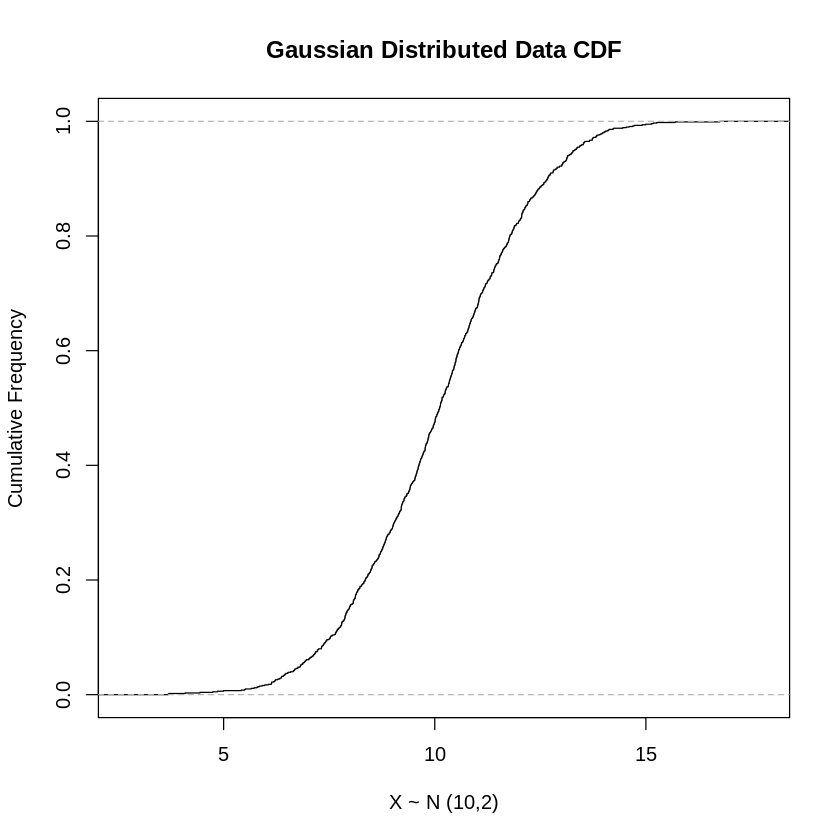

In [52]:
# Plotting Gaussian Distributed Data CDF:
plot(ecdf(norm_data),
    main="Gaussian Distributed Data CDF",
    xlab="X ~ N (10,2)",
    ylab="Cumulative Frequency")

In [53]:
# Tranforming Gaussian Distributed Data to Uniformly Distributed Data:
norm_data_uscores <- UScoreTransform(norm_data)

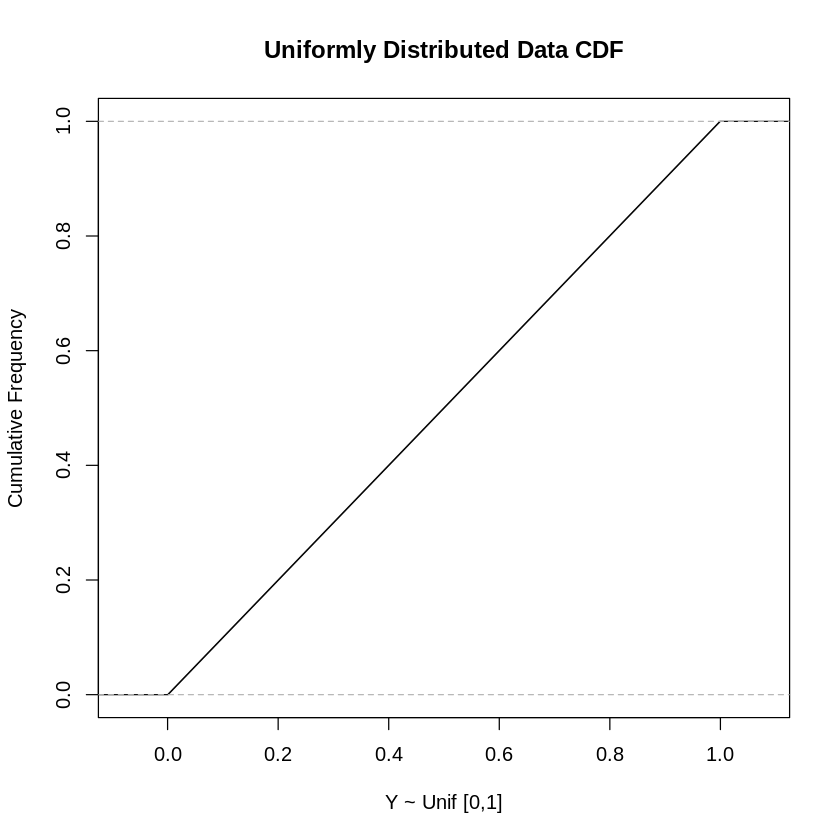

In [54]:
# Plotting Gaussian Distributed Data CDF:
plot(ecdf(norm_data_uscores),
    main="Uniformly Distributed Data CDF",
    xlab="Y ~ Unif [0,1]",
    ylab="Cumulative Frequency")